In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("CPI.xlsx")
df['Month'] = pd.DatetimeIndex(df['Month'],)
df.head()

,Month,Commodity Description,Provisional / Final,Current Month,Inflation Y-o-Y
0,2022-08-01,A) General Index,Final,174.3,6.998158
1,2022-07-01,A) General Index,Final,173.4,6.707692
2,2022-06-01,A) General Index,Final,172.6,7.005580
3,2022-05-01,A) General Index,Final,171.7,7.044888
4,2022-04-01,A) General Index,Final,170.1,7.794677


In [3]:
data = pd.DataFrame(df[["Month","Inflation Y-o-Y"]])
data.set_index('Month',inplace=True)
data.head()

,Inflation Y-o-Y
Month,
2022-08-01,6.998158
2022-07-01,6.707692
2022-06-01,7.005580
2022-05-01,7.044888
2022-04-01,7.794677


In [4]:
data.sort_index(inplace=True)

In [5]:
data.head()

,Inflation Y-o-Y
Month,
2014-01-01,8.604207
2014-02-01,7.882241
2014-03-01,8.246445
2014-04-01,8.482564
2014-05-01,8.325538


<AxesSubplot:xlabel='Month'>

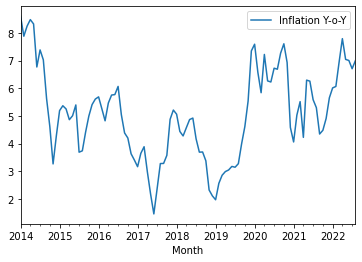

In [6]:
data.plot()

In [7]:
data.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', name='Month', length=104, freq=None)

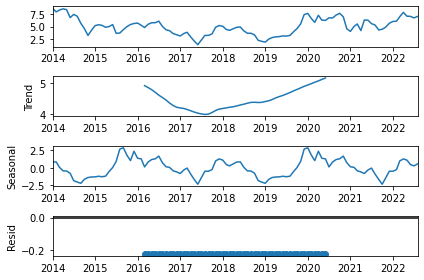

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
trend = seasonal_decompose(data,period=int(len(data)/2))
trend.plot()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.557355
p-value: 0.504972
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


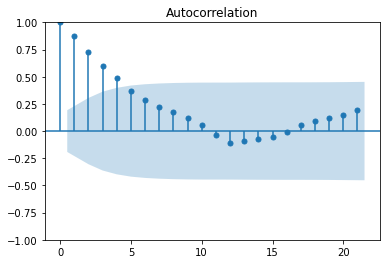

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


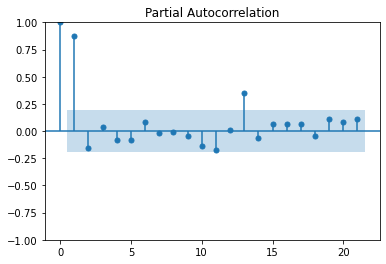

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)
plt.show()

In [12]:
data_diff = data.diff()
data_diff.head()

,Inflation Y-o-Y
Month,
2014-01-01,NaN
2014-02-01,-0.721965
2014-03-01,0.364204
2014-04-01,0.236118
2014-05-01,-0.157026


<AxesSubplot:xlabel='Month'>

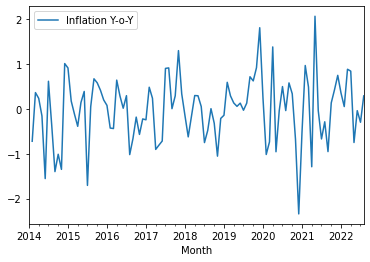

In [13]:
data_diff.plot()

In [14]:
data_diff.dropna(inplace=True)
data_diff.head()

,Inflation Y-o-Y
Month,
2014-02-01,-0.721965
2014-03-01,0.364204
2014-04-01,0.236118
2014-05-01,-0.157026
2014-06-01,-1.555181


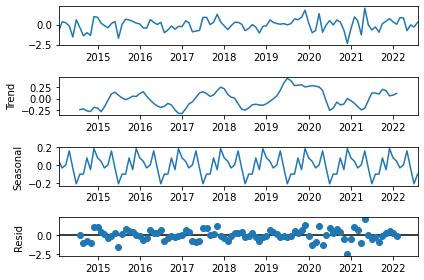

In [15]:
trend = seasonal_decompose(data_diff,period = 12)
trend.plot()
plt.show()

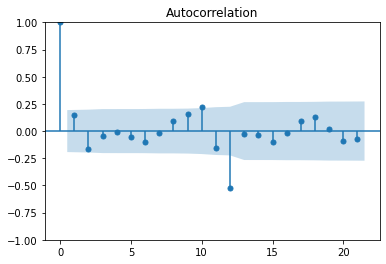

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)
plt.show()

/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


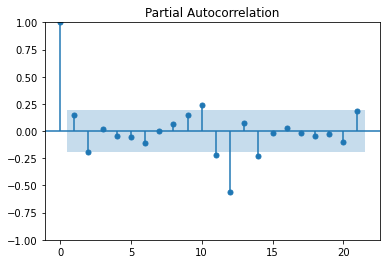

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_diff)
plt.show()

In [18]:
adf_result = adfuller(data_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.376659
p-value: 0.000326
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


In [19]:
from statsmodels.tsa.arima.model import ARIMA  
mymodel = ARIMA(data, order = (1, 1, 1))  
res = mymodel.fit()  
print(res.summary()) 

                               SARIMAX Results                                
Dep. Variable:        Inflation Y-o-Y   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -110.890
Date:                Thu, 10 Nov 2022   AIC                            227.779
Time:                        20:01:39   BIC                            235.683
Sample:                    01-01-2014   HQIC                           230.981
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4646      0.358     -1.297      0.195      -1.166       0.237
ma.L1          0.6698      0.314      2.135      0.033       0.055       1.284
sigma2         0.5038      0.058      8.724      0.0

/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


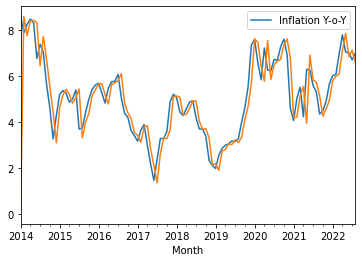

In [20]:
predictions = res.predict()
data.plot()
predictions.plot()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(data,test_size = 0.2,shuffle=False)

In [22]:
X_test.head()

,Inflation Y-o-Y
Month,
2020-12-01,4.587766
2021-01-01,4.061252
2021-02-01,5.030181
2021-03-01,5.518170
2021-04-01,4.227213


In [23]:
X_test.tail()

,Inflation Y-o-Y
Month,
2022-04-01,7.794677
2022-05-01,7.044888
2022-06-01,7.005580
2022-07-01,6.707692
2022-08-01,6.998158


In [24]:
from statsmodels.tsa.arima.model import ARIMA
mymodel = ARIMA(X_train, order = (1, 1, 1))  
res = mymodel.fit()  
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        Inflation Y-o-Y   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -80.864
Date:                Thu, 10 Nov 2022   AIC                            167.727
Time:                        20:01:40   BIC                            174.947
Sample:                    01-01-2014   HQIC                           170.626
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3391      0.331     -1.024      0.306      -0.988       0.310
ma.L1          0.6067      0.295      2.058      0.040       0.029       1.185
sigma2         0.4202      0.062      6.822      0.0

/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/varunhr/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


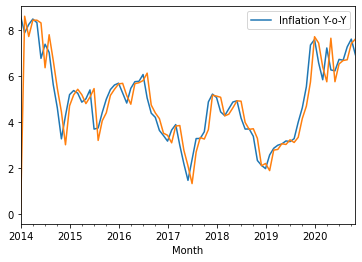

In [25]:
predictions = res.predict()
X_train.plot()
predictions.plot()
plt.show()

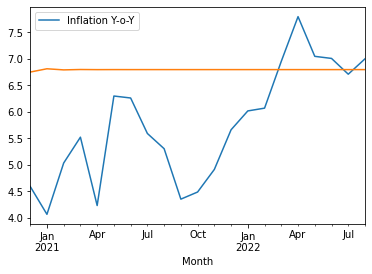

In [26]:
pred = res.predict(start='2020-12-01',end='2022-08-01')
X_test.plot()
pred.plot()
plt.show()

In [27]:
rmse=sqrt(mean_squared_error(X_test,pred))
print(rmse)

NameError: name 'sqrt' is not defined

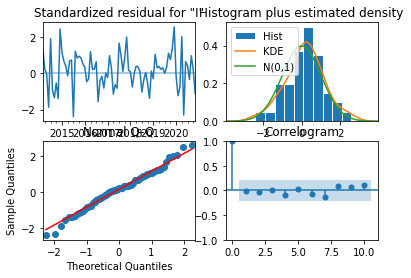

In [ ]:
res.plot_diagnostics()
plt.show()

In [ ]:
import pmdarima as pm
SARIMA_model = pm.auto_arima(X_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

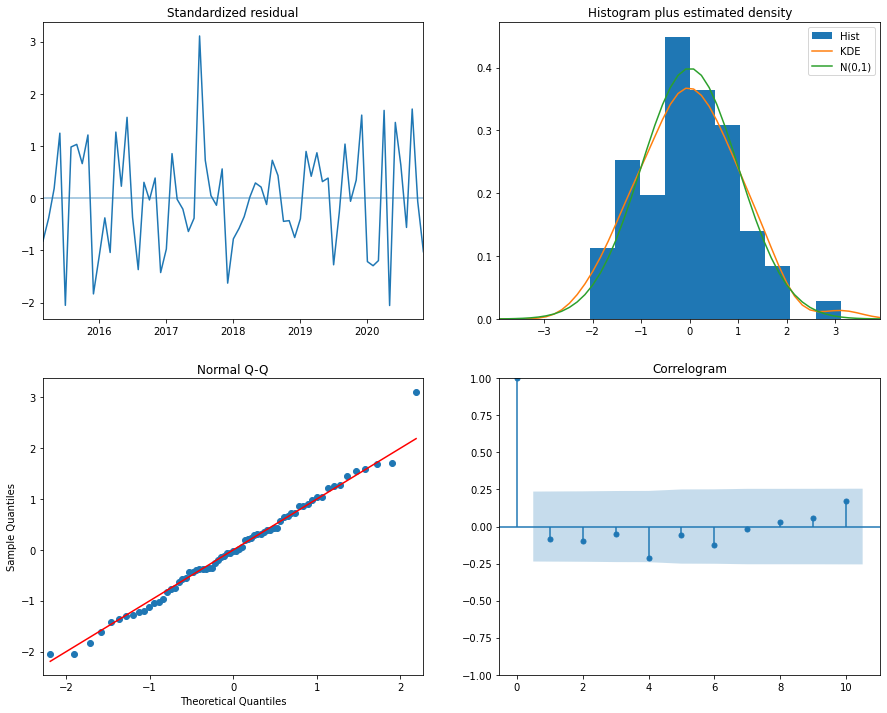

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
def forecast(SARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(X_train.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')
    # make series for plotting purpose
    df = pd.DataFrame(fitted.values,index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(X_train["Inflation Y-o-Y"], color='#1f76b4')
    plt.plot(df, color='red')
    plt.plot(X_test,color='green')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of CPI")
    plt.show()
    return df

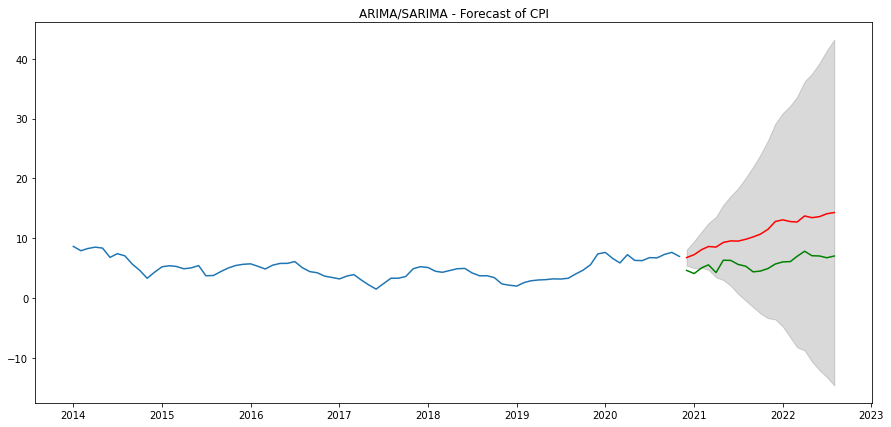

In [ ]:
pred1 = forecast(SARIMA_model,len(X_test))

In [ ]:
###rmse for SARIMA
rmse=sqrt(mean_squared_error(X_test,pred1))
print(rmse)

5.457024151497907
